In [1]:
#Imports
import sys
sys.path.append("../")
import numpy
import matplotlib
from classes import ModelWrapper, DataLoader, Cluster, Plotting

#Interactive matplotlib plots
%matplotlib widget

2024-03-21 12:52:37.005429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Initialisation
modelAPI = ModelWrapper.loadPostprocessed("../models/3D/base", "base")
track_type = "alltracks"
data_loader = DataLoader("../data")
noisy = data_loader.getBatch(True, True, track_type=track_type, normalising=True)
noisy_with_E = data_loader.getBatch(True, True, track_type=track_type, normalising=False)
clean = data_loader.getBatch(True,False, track_type=track_type)
classified = modelAPI.classify( modelAPI.evaluateBatch(noisy) )
good_NN = Cluster.getGoodFromDataset(classified, noisy_with_E)
names = data_loader.getX17Names(track_type)

cmap = matplotlib.pyplot.get_cmap("Greys")
cmap.set_under('cyan')
eps = 1e-8

2024-03-21 12:52:38.383217: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


21/21 [==============================] - 5s 213ms/step


[(0, 0, 84), (1, 2, 17), (1, 4, 17), (2, 4, 17), (2, 9, 99), (2, 9, 100), (2, 9, 101), (2, 9, 102), (2, 9, 103), (2, 9, 104), (2, 9, 105), (2, 9, 106), (2, 9, 107), (2, 9, 108), (3, 9, 107), (3, 9, 108), (3, 9, 109), (3, 9, 110), (3, 9, 111), (3, 9, 112), (3, 9, 113), (3, 9, 114), (3, 9, 115), (3, 9, 116), (3, 9, 117), (3, 9, 118), (3, 9, 119), (3, 9, 120), (3, 9, 121), (3, 9, 123), (3, 9, 124), (3, 9, 126), (3, 9, 127), (3, 9, 128), (4, 9, 118), (4, 9, 119), (4, 9, 120), (4, 9, 121), (4, 9, 122), (4, 9, 123), (4, 9, 124), (4, 9, 125), (4, 10, 124), (4, 10, 125), (4, 10, 126), (4, 10, 127), (4, 11, 117), (4, 11, 118), (4, 11, 119), (4, 11, 120), (5, 10, 126), (5, 10, 127), (5, 10, 128), (5, 10, 129), (5, 10, 130), (5, 10, 131), (5, 10, 132), (5, 10, 133), (5, 10, 134), (5, 10, 135), (5, 10, 136), (6, 10, 135), (6, 10, 136), (6, 10, 137), (6, 10, 138), (6, 10, 139), (6, 10, 140), (6, 10, 141), (6, 10, 142), (8, 12, 33)]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

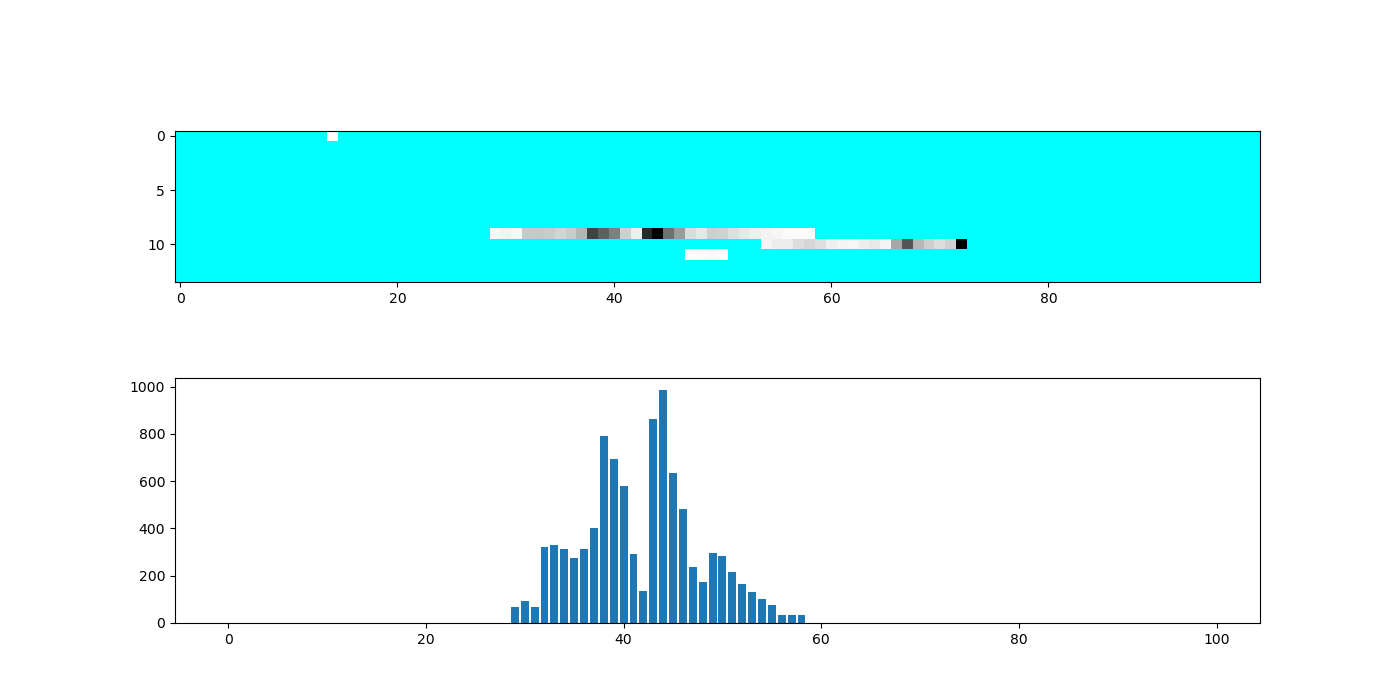

In [5]:
event_name = "track326"
event_noise = data_loader.getEventFromName(event_name, noisy=True, normalising=False)
event_nonNN = data_loader.getEventFromName(event_name, noisy=False)

waveform = event_noise[2][9] + event_noise[3][9] + event_noise[4][9]
#waveform = event_noise[4][10] + event_noise[5][10] + event_noise[6][10]
print(list(zip(*numpy.nonzero(event_noise))))
print(waveform)

fig, ax = matplotlib.pyplot.subplots(2)
ax[0].imshow(numpy.sum(event_noise[:,:,70:170], 0), cmap, vmin=eps)
ax[1].bar([i for i in range(0,100)], waveform[70:170])
fig.set_size_inches(14, 7)
matplotlib.pyplot.show()